# Espectrograma - Franco Bautista

In [58]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt

sampling_frequency, wav_data = scipy.io.wavfile.read('Voice.wav')

In [59]:
def spectrogram(x, fs, window_duration=0.005, step_duration=None, dyn_range=120, 
                         cmap=None, ax=None):

    from scipy.signal import spectrogram, gaussian
    from matplotlib.colors import LogNorm
    from matplotlib.cm import get_cmap
    
    if step_duration is None:
        step_duration = window_duration/np.sqrt(np.pi)/8.
    
    window_nsamp = int(window_duration*fs*2)
    step_nsamp = int(step_duration*fs)
    
    
    window_sigma = (window_nsamp + 1) / 6
    window = gaussian(window_nsamp, window_sigma)
    
    noverlap = window_nsamp - step_nsamp
    
    freqs, times, power = spectrogram(x, detrend=False, mode='psd', fs=fs,
                                    scaling='density', noverlap=noverlap,
                                     window=window, nperseg=window_nsamp)

    p_ref = 2e-5  
   
    dB_max = 10*np.log10(power.max()/(p_ref**2))
    vmin = p_ref*10**((dB_max-dyn_range)/10)

    if cmap is None:
        cmap = get_cmap('Greys')
 
    elif isinstance(cmap, str):
        cmap = get_cmap(cmap)

    if ax is None:
        fig, ax = plt.subplots()

    extent = (times.min(), times.max(), freqs.min(), freqs.max())

    ax.imshow(power, origin='lower', aspect='auto', cmap=cmap,
              norm=LogNorm(), extent=extent, vmin=vmin, vmax=None)
    
    return ax

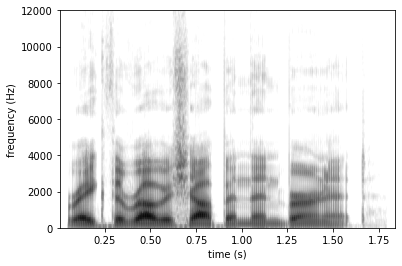

In [61]:
ax = spectrogram(wav_data, sampling_frequency)
ax.set_ylim(0, 8000)
ax.set_xlabel('time (s)')
ax.set_ylabel('frequency (Hz)');